## drinks
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 출력하고 결측치가 존재하는가?
3. 컬럼의 이름들이 영문으로 되어있기 때문에 한글로 컬럼의 이름을 변경
4. 특정 컬럼에 결측치가 존재하기 때문에 결측치를 특정 문자로 대체
5. '총술소비량' 파생변수를 생성하여 술소비량 데이터들의 합산 대입
6. '순수알콜량'과 '총술소비량' 데이터를 기준으로 '도수'컬럼을 생성
7. 과연 한국의 총술소비량이 전체에서 몇위인가? 한국 사람들은 얼마나 독한 술을 먹는가?

In [ ]:
import pandas as pd

In [ ]:
# drinks.csv 파일 로드 
# 상위 폴더 이동(../) + csv 하위폴더로 이동(csv/) + drinks.csv
drinks = pd.read_csv("../csv/drinks.csv")

In [ ]:
drinks.head()

In [ ]:
## 데이터프레임의 정보를 확인 
drinks.info()

In [ ]:
drinks.describe()

In [ ]:
drinks['continent'].describe()

In [ ]:
drinks['continent'].value_counts()

In [ ]:
## 결측치의 개수를 확인
drinks.isna().sum()

In [ ]:
## 컬럼의 이름을 변경 
drinks.columns = ['국가', '맥주소비량', '위스키소비량', '와인소비량', '순수알콜량', 
                  '대륙']

In [ ]:
drinks.head(1)

In [ ]:
# 대륙 컬럼에 있는 결측치를 'OT' 문자열로 대체
drinks['대륙'] = drinks['대륙'].fillna('OT')

In [ ]:
drinks

In [ ]:
# 백업데이터를 생성 
df = drinks.copy()

In [ ]:
# case1
df['맥주소비량'] + df['위스키소비량'] + df["와인소비량"]

In [ ]:
# case2
df['총술소비량'] = df.loc[:,"맥주소비량" : "와인소비량"].sum(axis=1)

In [ ]:
df.head()

In [ ]:
## '도수'컬럼을 생성하여 (순수알콜량 / 총술소비량) * 100
df['도수'] = ((df['순수알콜량'] / df['총술소비량']) * 100).fillna(0)

In [ ]:
df.head()

In [ ]:
## 총술소비량이 가장 높은 국가 10위까지 확인 
df.sort_values(['총술소비량'], ascending=False).head(10)

In [ ]:
## 총술소비량을 기준으로 내림차순 정렬 
df.sort_values(['총술소비량'], ascending=False, inplace=True)

In [ ]:
df.head()

In [ ]:
## 한국의 데이터만 필터링 
## df['국가'] == South Korea
flag = df['국가'] == 'South Korea'
df.loc[flag]

In [ ]:
# df의 인덱스를 초기화 (기존의 인덱스는 제거)
df.reset_index(drop=True, inplace=True)

In [ ]:
flag = df['국가'] == 'South Korea'
df.loc[flag]

In [ ]:
## 도수를 기준으로 한국의 랭킹을 확인 
# 도수를 기준으로 내림차순 정렬
df.sort_values(['도수'], ascending=False, inplace=True)

In [ ]:
# 인덱스를 초기화하고 기존의 인덱스는 제거
df.reset_index(drop=True, inplace=True)

In [ ]:
flag = df['국가'] == 'South Korea'
df.loc[flag]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 총술소비량 데이터를 기준으로 막대그래프 생성 
df2 = df.copy()
df2.sort_values(['총술소비량'], ascending=False, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [ ]:
# df2에서 한국의 인덱스의 값과 총술소비량 데이터를 추출하여 변수에 대입 
flag = df2['국가'] == 'South Korea'
korea_index = df2.loc[flag].index[0]
korea_value = df2.loc[korea_index, '총술소비량']

In [ ]:
import platform
if platform.system() == 'Darwin':
    # MAC의 경우 
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
# x축 데이터 : 국가명
# y축 데이터 : 총술소비량
x = df2.index
y = df2['총술소비량']

# 그래프의 크기를 변경 
plt.figure(figsize=(20, 8))
graph = plt.bar(x, y)
graph[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    f"South Korea / rank : {korea_index + 1}, 총술소비량 : {korea_value}", 
    # 주석데이터가 의미하는 막대의 좌표
    xy = (korea_index, korea_value), 
    # 주석의 위치
    xytext = (korea_index + 10, korea_value + 100) , 
    # 주석의 크기를 변경
    fontsize = 20,
    # 주석과 막대 사이에 화살표를 추가 
    arrowprops= {
        'facecolor' : 'r', 
        'edgecolor' : 'k', 
        'headwidth' : 20, 
        'headlength' : 20, 
        'width' : 10, 
        'shrink' : 0.1
    }
)

# x축의 데이터들을 회전 
plt.xticks(rotation=90)
plt.show()

- df 데이터를 이용한 그래프 시각화
- 도수 컬럼을 기준으로 막대그래프 생성
- 한국의 막대의 색을 변경 
- 주석을 생성하여 South Korea : 랭킹(index+1), value : 도수 추가

In [ ]:
df.head()

In [88]:
# 한국이 몇번째 위치에 데이터가 존재하는가?
flag = df['국가'] == 'South Korea'
korea_index = df.loc[flag].index[0]
korea_value = df.loc[korea_index, '도수']

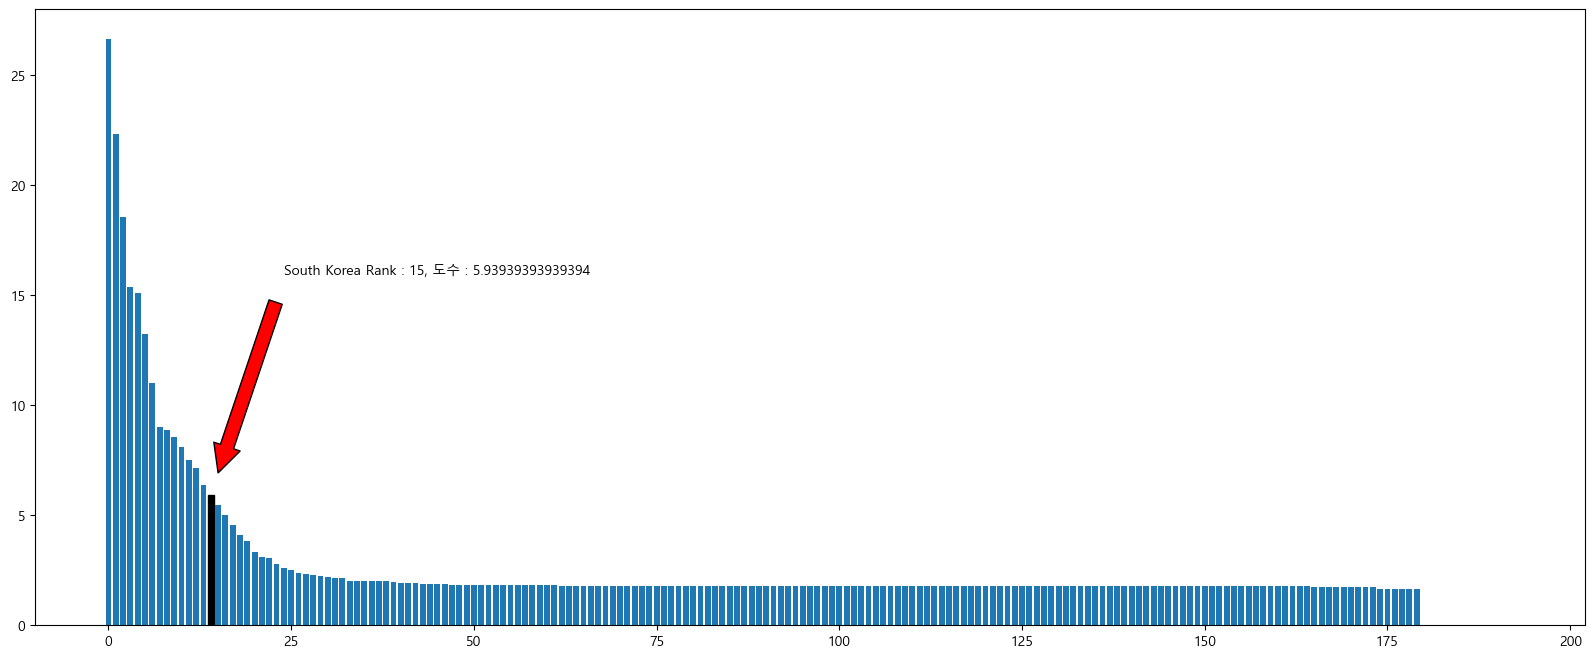

In [94]:
# 막대 그래프를 생성 
# x 데이터 : df의 인덱스 값
x = df.index
# y 데이터 :df의 도수 컬럼의 데이터
y = df['도수']

# 그래프의 크기를 변경
plt.figure(figsize=(20, 8))
graph = plt.bar(x, y)
# 특정 막대의 색상을 변경
graph[korea_index].set_color('k')

# 그래프에 주석을 추가 
plt.annotate(
    # 주석의 텍스트를 입력
    f"South Korea Rank : {korea_index + 1}, 도수 : {korea_value}", 
    # 주석이 설명하는 막대의 위치 
    xy = (korea_index, korea_value),
    # 주석의 위치
    xytext= (korea_index + 10, korea_value+10),
    # 화살표를 추가 (주석의 위치부터 주석이 설명하는 막대의 위치)
    arrowprops= {
        # 화살표의 내부의 색상
        'facecolor' : 'r', 
        # 화살표 테두리의 색상
        'edgecolor' : 'k', 
        # 화살표 머리의 너비 
        'headwidth' : 20, 
        # 화살표 머리의 길이
        'headlength' : 20, 
        # 화살표 꼬리의 너비 
        'width' : 10, 
        # 화살표와 주석 사이의 거리 (비율)
        'shrink' : 0.1
    }

)

plt.show()